<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%203%20Deep%20RL%201/PendulumRandom_sln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum Random Exercise


Create and environment called **Pendulum-v0**.  This environment is from the **classic control** group of environments.

The pendulum starts in a random position, and the goal is to swing it up so it stays upright. When it is upright, the angle of the pole is zero

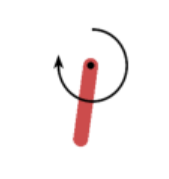

The reward in the Pendulum environment is the angle that the pole gets to, therefore the aim is to get a reward of zero meaning that the pole is upright

# Try random actions to try and get Pendulum to the upright position
The following cell is just to get Colab to render the Pendulum environment

In [ ]:
# code to render the CartPole environment in Colab
!sudo apt-get install -y xvfb ffmpeg
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay

from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
from IPython.display import clear_output
from time import sleep

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# import gym and test that the rendering works
import gym
# make the pendulum environment
env = gym.make("Pendulum-v0")   # update to load the Pendulum-v0 environment
env.reset()
plt.imshow(env.render(mode='rgb_array'))


Load the environment

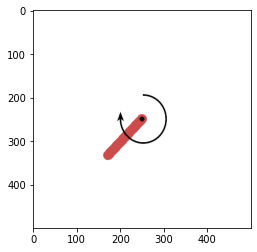

In [ ]:
# import gym and test that the rendering works
import gym
# make the pendulum environment
env = gym.make("Pendulum-v0")   # update to load the Pendulum-v0 environment
env.reset()
plt.imshow(env.render(mode='rgb_array'))

Investigate the `action_space` and `observation_space` of the `Pendulum-v0` environment.  How many actions does it have? How many observations does it have? Are they continuous or discrete values?

In [ ]:
# investigate the action_space and observation_space here
print(env.action_space)
print(env.observation_space)

print('action space bounds')
print(env.action_space.low)
print(env.action_space.high)

print('observation space bounds')
print(env.observation_space.low)
print(env.observation_space.high)

Box(-2.0, 2.0, (1,), float32)
Box(-8.0, 8.0, (3,), float32)
action space bounds
[-2.]
[2.]
observation space bounds
[-1. -1. -8.]
[1. 1. 8.]


Both the action and observation space are of `Box` type so they are continuous values.  The actions are float numbers between the range -2 and +2.  The observations are 3 numbers between, with the first 2 between -1 and 1 and the last one between -8 and 8.  They represent the andle of the pendulum and its velocity. See below for more information (from https://mspries.github.io/jimmy_pendulum.html) 

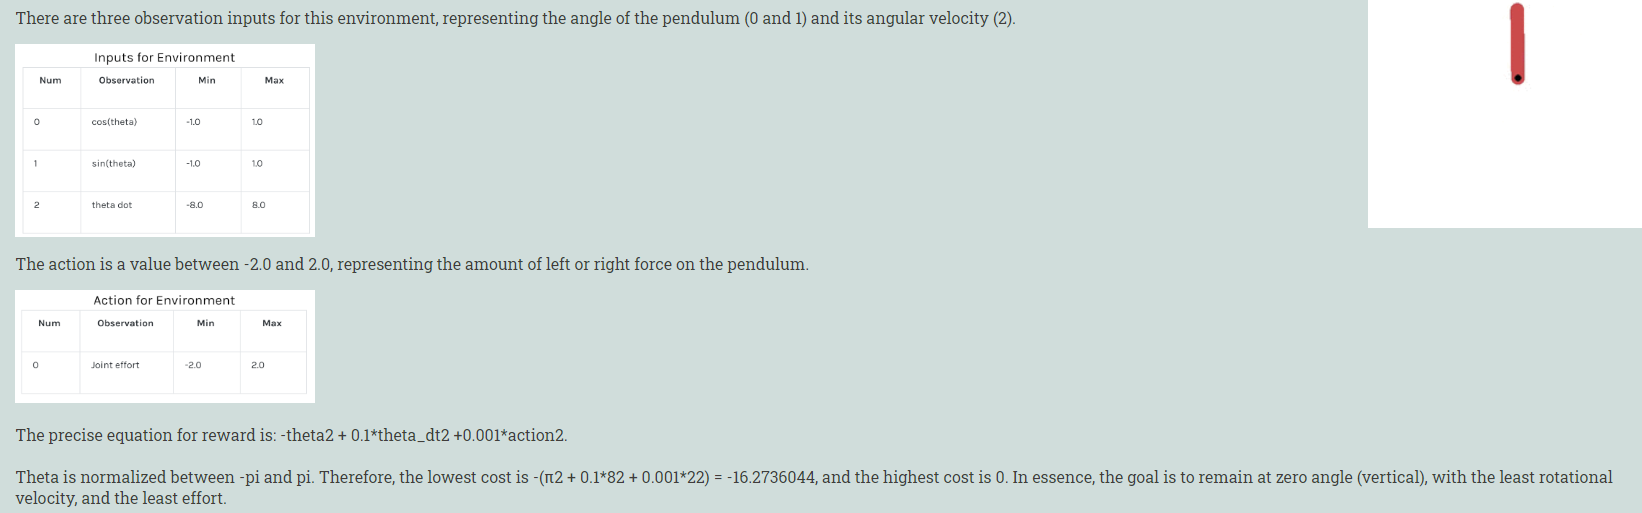

It's not always neccessary to know exactly what the actions and observations mean in RL as teh algorithms will be using them, but some aspects are useful to know such as whether it is a discrete or contunuous action space, as algorithms can be selected/adjusted based on this knowledge

Run one episode of Pendulum using random actions.  If it takes too long to run, set `showImage = False` in the cell below

step number: 19
action: [-0.34365085]
obs: [ 0.25972254 -0.96568328  0.20326803]
reward: -1.834074967130218
done: False


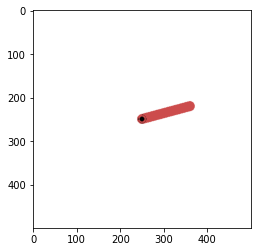

KeyboardInterrupt: ignored

In [ ]:
# the following code is the agent
# initialise the agent by setting the reward and total steps to zero and the
total_reward = 0.0
total_steps = 0
obs = env.reset()
showImage = True

step_num = 1
while True:
    clear_output()
    print('step number: %s'%(step_num))
    action = env.action_space.sample()        # gets a random action from the environment (either 1 or 0)
    print('action: %s'%(action))              # print out the action we have received
    obs, reward, done, _ = env.step(action)   # execute the action via the step method
                                              # returns the observation, reward and boolean indicating if the episode has finished
                                              # (the fourth parameter is for diagnostic purposes and we do not need to know about it for this tutorial)
    print('obs: %s'%(obs))                    # print observation - array of length 4
    print('reward: %s'%(reward))              # see what the reward was
    print('done: %s'%(done))                  # see if the environment has ended the episode i.e. you may have tipped the pole over)
                                              # (boolean: False means episode still running. True means episode ended)
    if showImage:
      plt.imshow(env.render(mode='rgb_array'))  # render the observations for demo purposes. Massively slows it down so set showImage to False to speed it up
      plt.show()                                # plot the image
      sleep(1)                                  # sleep the thread so that we can see the image
    
    total_reward += reward                    # sum the rewards                 
    total_steps += 1                          # increment total number of steps
    if done:
        break
    step_num += 1

print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))


Run multiple episodes of Pendulum

In [ ]:
import numpy as np

# set the number of episodes to 500
episodes = 500
# set up an empty array so that the reward for each episode can be stored
total_rewards=np.zeros(episodes)

for episode_num in range(episodes):
  # the following code is the agent
  # initialise the agent by setting the reward and total steps to zero and the
  total_reward = 0.0
  total_steps = 0
  obs = env.reset()
  showImage = False

  n = 1
  while True:
      action = env.action_space.sample()        # gets a random action from the environment (either 1 or 0)
      obs, reward, done, _ = env.step(action)   # execute the action via the step method
                                                # returns the observation, reward and boolean indicating if the episode has finished
                                                # (the fourth parameter is for diagnostic purposes and we do not need to know about it for this tutorial)

      # print out the information in one line
      print("Episode %d, step %d, action %d, reward %d, Done=%s" % (episode_num, n, action, reward, done))

      if showImage:
        plt.imshow(env.render(mode='rgb_array'))  # render the observations for demo purposes. Massively slows it down so set showImage to False to speed it up
        plt.show()                                # plot the image
        sleep(1)                                  # sleep the thread so that we can see the image
      
      total_reward += reward                    # sum the rewards                 
      total_steps += 1                          # increment total number of steps
      if done:
          break
      n += 1

  print("Episode %d done in %d steps, total reward %.2f" % (episode_num, total_steps, total_reward))
  total_rewards[episode_num]=total_reward       # store the total reward for this episode
  episode_num += 1


Streaming output truncated to the last 5000 lines.
Episode 475, step 26, action 1, reward -7, Done=False
Episode 475, step 27, action 1, reward -6, Done=False
Episode 475, step 28, action -1, reward -6, Done=False
Episode 475, step 29, action 1, reward -6, Done=False
Episode 475, step 30, action 1, reward -6, Done=False
Episode 475, step 31, action 1, reward -6, Done=False
Episode 475, step 32, action 0, reward -6, Done=False
Episode 475, step 33, action 0, reward -7, Done=False
Episode 475, step 34, action 1, reward -8, Done=False
Episode 475, step 35, action 1, reward -9, Done=False
Episode 475, step 36, action 0, reward -10, Done=False
Episode 475, step 37, action 0, reward -10, Done=False
Episode 475, step 38, action 0, reward -9, Done=False
Episode 475, step 39, action -1, reward -8, Done=False
Episode 475, step 40, action 0, reward -7, Done=False
Episode 475, step 41, action 1, reward -6, Done=False
Episode 475, step 42, action 0, reward -6, Done=False
Episode 475, step 43, actio

Plot the reward for each episode

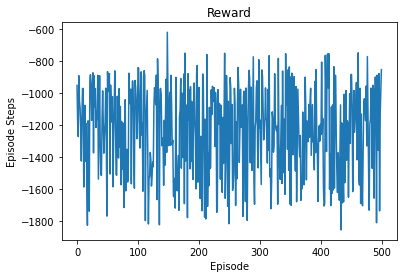

In [ ]:
plt.xlabel('Reward')
plt.ylabel('Episode Steps')
plt.plot(total_rewards)
plt.show()

We have shown how we have different action and observation spaces and rewards for different environments.